<a href="https://colab.research.google.com/github/lucassrmelo/dengue_brasil/blob/main/Dengue_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Dengue Brasil

### Introdução

A dengue faz parte de um grupo de doenças denominadas arboviroses, que se caracterizam por serem causadas por vírus transmitidos por vetores artrópodes. No Brasil, o vetor da dengue é a fêmea do mosquito Aedes aegypti (significa "odioso do Egito"). Os vírus dengue (DENV) estão classificados cientificamente na família Flaviviridae e no gênero Flavivirus. Até o momento são conhecidos quatro sorotipos – DENV-1, DENV-2, DENV-3 e DENV-4 –, que apresentam distintos materiais genéticos (genótipos) e linhagens.<br/>

As evidências apontam que o mosquito tenha vindo nos navios que partiam da África com escravos. No Brasil, a primeira epidemia documentada clínica e laboratorialmente ocorreu em 1981-1982, em Boa Vista (RR), causada pelos sorotipos 1 e 4. Após quatro anos, em 1986, ocorreram epidemias atingindo o estado do Rio de Janeiro e algumas capitais da região Nordeste. Desde então, a dengue vem ocorrendo de forma continuada (endêmica), intercalando-se com a ocorrência de epidemias, geralmente associadas à introdução de novos sorotipos em áreas indenes (sem transmissão) e/ou alteração do sorotipo predominante, acompanhando a expansão do mosquito vetor.<br/>

Aspectos como a urbanização, o crescimento desordenado da população, o saneamento básico deficitário e os fatores climáticos mantêm as condições favoráveis para a presença do vetor, com reflexos na dinâmica de transmissão desses arbovírus. A dengue possui padrão sazonal, com aumento do número de casos e o risco para epidemias, principalmente entre os meses de outubro de um ano a maio do ano seguinte.

### Sinais e sintomas

 dengue é uma doença febril aguda, sistêmica, dinâmica, debilitante e autolimitada. A maioria dos doentes se recupera, porém, parte deles podem progredir para formas graves, inclusive virem a óbito. A quase totalidade dos óbitos por dengue é evitável e depende, na maioria das vezes, da qualidade da assistência prestada e organização da rede de serviços de saúde.

 Todo indivíduo que apresentar febre (39°C a 40°C) de início repentino e apresentar pelo menos duas das seguintes manifestações - dor de cabeça, prostração, dores musculares e/ou articulares e dor atrás dos olhos – deve procurar imediatamente um serviço de saúde, a fim de obter tratamento oportuno.

### Link Ministério de Saúde

Base de Dados da MS: http://tatabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebr.def

Documentos importantes: http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/d0203.pdf

In [3]:
#Libs - bibliotecas importantes

#Manipulação dos dados
import pandas as pd
import numpy as np

#visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

In [5]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [6]:
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


## Explorando o dataset

In [7]:
print(f'Tamanho do nosso Dataset: {df_dengue.shape}')

Tamanho do nosso Dataset: (728772, 4)


In [8]:
# Caracteristicas (tipo) das colunas
df_dengue.dtypes

,0
municipio,object
uf,object
data_infeccoes,datetime64[ns]
qtd_infeccoes,int64


Existe valores nulos?

In [9]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


informacões sobre a base

In [10]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


Verificar os valores únicos?

In [11]:
df_dengue.nunique()

,0
municipio,5243
uf,27
data_infeccoes,132
qtd_infeccoes,1157


Precisamos calcular a quantidade de pessoas que pegaram dengue por municipio por ano

In [12]:
# Criar uma Coluna de ano
df_dengue['ano'] = df_dengue['data_infeccoes'].dt.year

In [13]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [14]:
infeccoes_municipio = df_dengue.groupby(['ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [15]:
infeccoes_municipio.head()

,ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [16]:
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


Agrupar por Estado e ano

In [17]:
infeccoes_estado = df_dengue.groupby(['ano', 'uf'])['qtd_infeccoes'].sum().reset_index()

In [18]:
infeccoes_estado.head()

,ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


Estatisticas Descritivas

In [19]:
infeccoes_estado.describe()

,ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [20]:
infeccoes_estado.shape

(297, 3)

Interpreatação da estatistica descritiva utilizando o grafico de boxplot

<Axes: ylabel='qtd_infeccoes'>

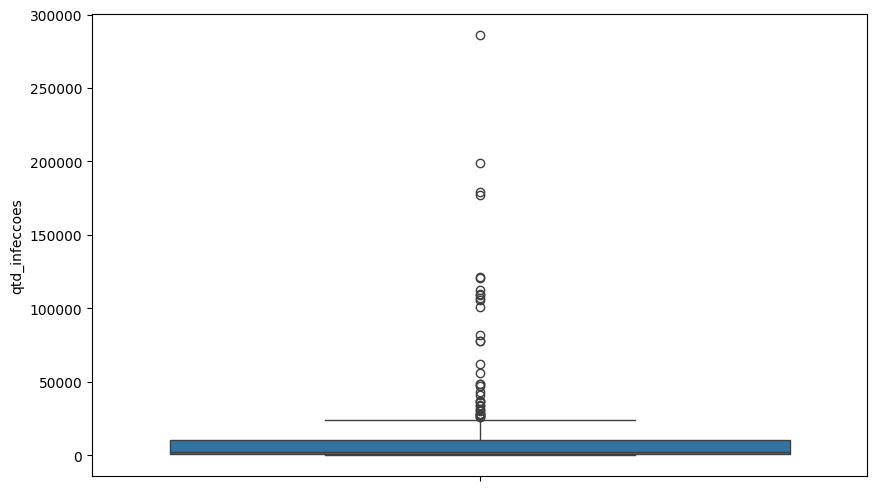

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot( y='qtd_infeccoes', data=infeccoes_estado)

/tmp/ipython-input-2888332377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ano', y='qtd_infeccoes', data=infeccoes_estado,palette='viridis')


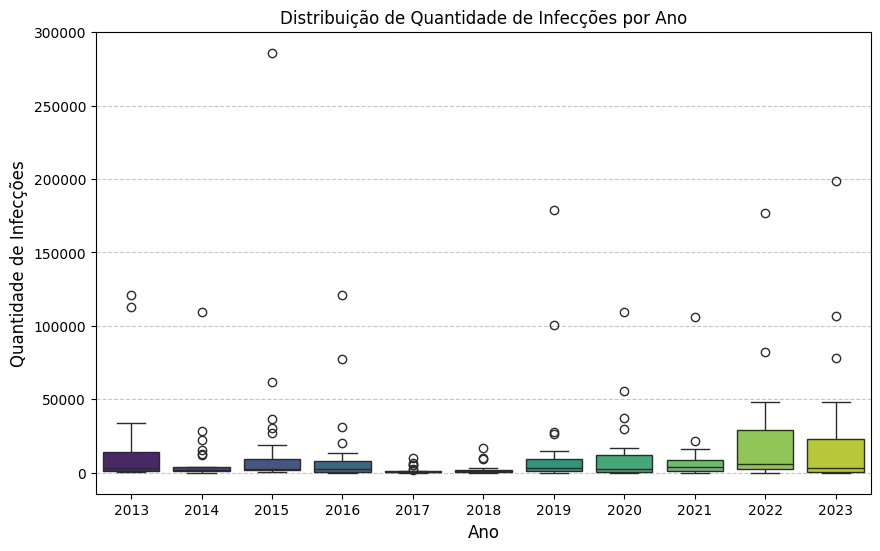

In [24]:
# libs de visualização
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ano', y='qtd_infeccoes', data=infeccoes_estado,palette='viridis')


plt.title('Distribuição de Quantidade de Infecções por Ano')
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()


###Interpretação


O gráfico boxplot apresenta a distribuição das infecções por ano, evidenciando uma grande variabilidade na quantidade de casos confirmados. A presença de outliers demonstra períodos em que houve surtos de grande escala, o que reforça a necessidade de um monitoramento contínuo. Os picos de infecções coincidem com eventos climáticos favoráveis à proliferação do mosquito, como temporadas de chuvas intensas.

vamos olhar o ano de 2023

In [25]:
#filtrar os dados para o ano de 2023
infeccoes_estado_2023 = infeccoes_estado[infeccoes_estado['ano'] == 2023]
infeccoes_estado_2023

,ano,uf,qtd_infeccoes
270,2023,AC,1781
271,2023,AL,473
272,2023,AM,3263
273,2023,AP,742
274,2023,BA,13249
275,2023,CE,7437
276,2023,DF,23710
277,2023,ES,0
278,2023,GO,21682
279,2023,MA,2428


entendendo o ano de 2023

In [27]:
infeccoes_estado_2023.describe()

,ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


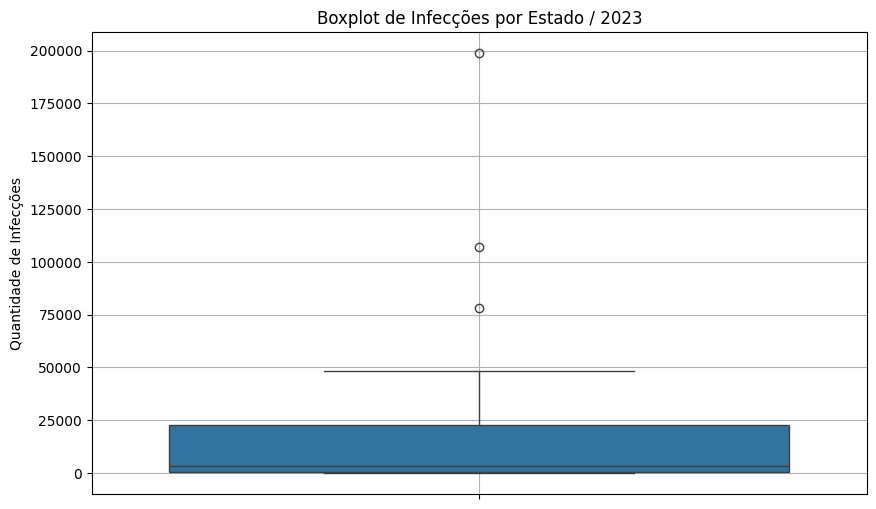

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='qtd_infeccoes', data=infeccoes_estado_2023)
plt.title('Boxplot de Infecções por Estado / 2023')
plt.ylabel('Quantidade de Infecções')
plt.grid(True)
plt.show()

In [31]:
#lib visualização plotly
import plotly.express as px

In [34]:
fig = px.box(infeccoes_estado_2023,  y='qtd_infeccoes', title='Boxplot de Infecções por Estado / 2023')
fig.show()

Comparação entre os estados, utilizar gráfico de barras

/tmp/ipython-input-643534247.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




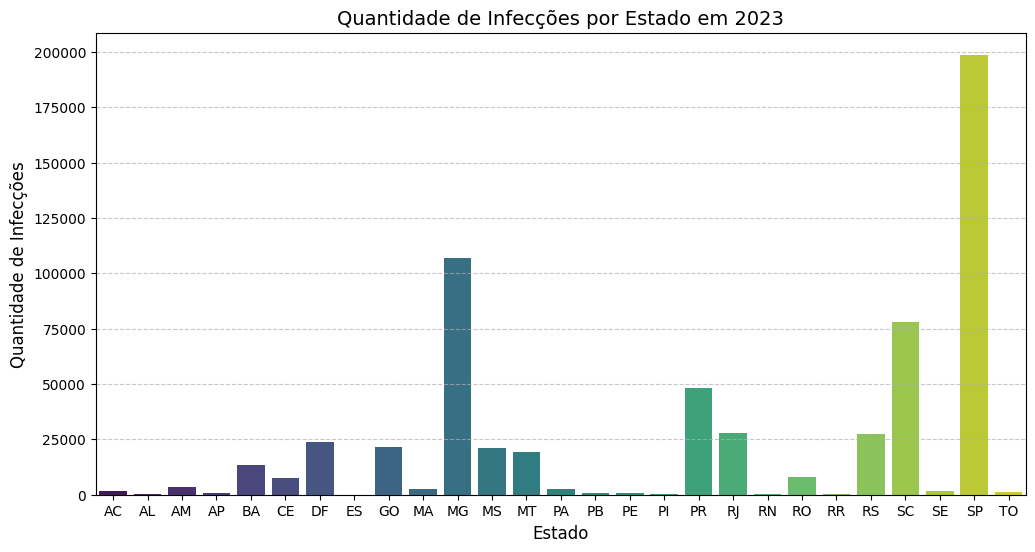

In [36]:
# criar gráfico de barras comparando a quantidade de infecções por estado em 2023
plt.figure(figsize=(12, 6))
sns.barplot(x='uf', y='qtd_infeccoes', data=infeccoes_estado_2023, palette='viridis')
plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

ordernar os dados do maior para o menir numero de inffecçoes

In [37]:
infeccoes_2023 = infeccoes_estado_2023.sort_values(by='qtd_infeccoes', ascending=False)

In [38]:
infeccoes_2023

,ano,uf,qtd_infeccoes
295,2023,SP,198774
280,2023,MG,106923
293,2023,SC,77954
287,2023,PR,48328
288,2023,RJ,27905
292,2023,RS,27389
276,2023,DF,23710
278,2023,GO,21682
281,2023,MS,21098
282,2023,MT,19356


/tmp/ipython-input-1525209108.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




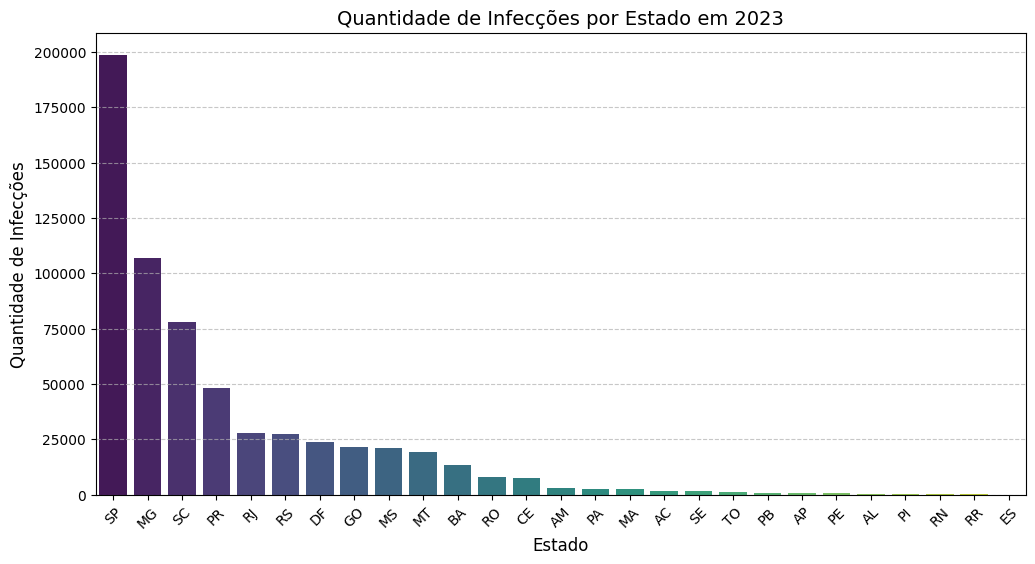

In [40]:
#criar grafico de barras comparando os estados de forma ordenada
plt.figure(figsize=(12, 6))
sns.barplot(x='uf', y='qtd_infeccoes', data=infeccoes_2023, palette='viridis')

#perdonalizar o grafico
plt.title('Quantidade de Infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.xticks(rotation=45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

### Interpretação

Este gráfico mostra a quantidade de infecções confirmadas em cada estado brasileiro no ano de 2023. São Paulo, Minas Gerais e Santa Catarina lideram em número absoluto de casos, o que pode estar relacionado à alta densidade populacional e condições climáticas favoráveis ao mosquito transmissor.

Gráfico de tendências

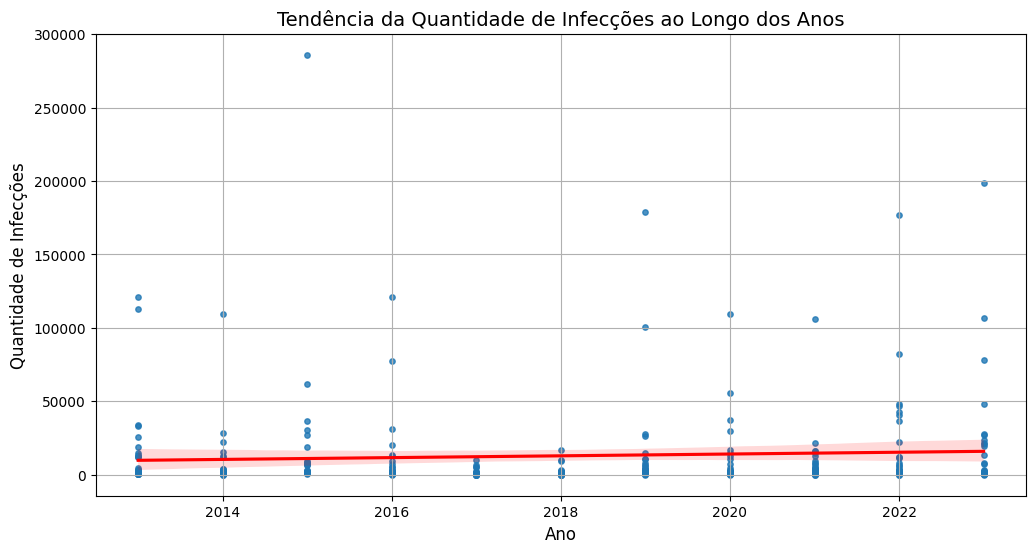

In [44]:
#criar o gráfico de tendencia
plt.figure(figsize=(12, 6))
sns.regplot(data = infeccoes_estado, x = 'ano', y = 'qtd_infeccoes',scatter_kws={"s":15}, line_kws = {'color': 'red'})

#personalizar o grafico
plt.title('Tendência da Quantidade de Infecções ao Longo dos Anos', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(True)